In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
types = pd.read_csv('/csc/epitkane/projects/multimodal/data/utils/classinfo_pcawg_.csv')

In [74]:
types

,Unnamed: 0,class_name,class_index,n_samples
0,0,Bone-Osteosarc,0,44
1,1,Breast-AdenoCA,1,198
2,2,CNS-GBM,2,41
3,3,CNS-Medullo,3,146
4,4,CNS-PiloAstro,4,89
5,5,ColoRect-AdenoCA,5,60
6,6,Eso-AdenoCA,6,98
7,7,Head-SCC,7,57
8,8,Kidney-ChRCC,8,45
9,9,Kidney-RCC,9,144


In [75]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(2, y[i], x[i], ha = 'left', va= 'center', color="white")

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

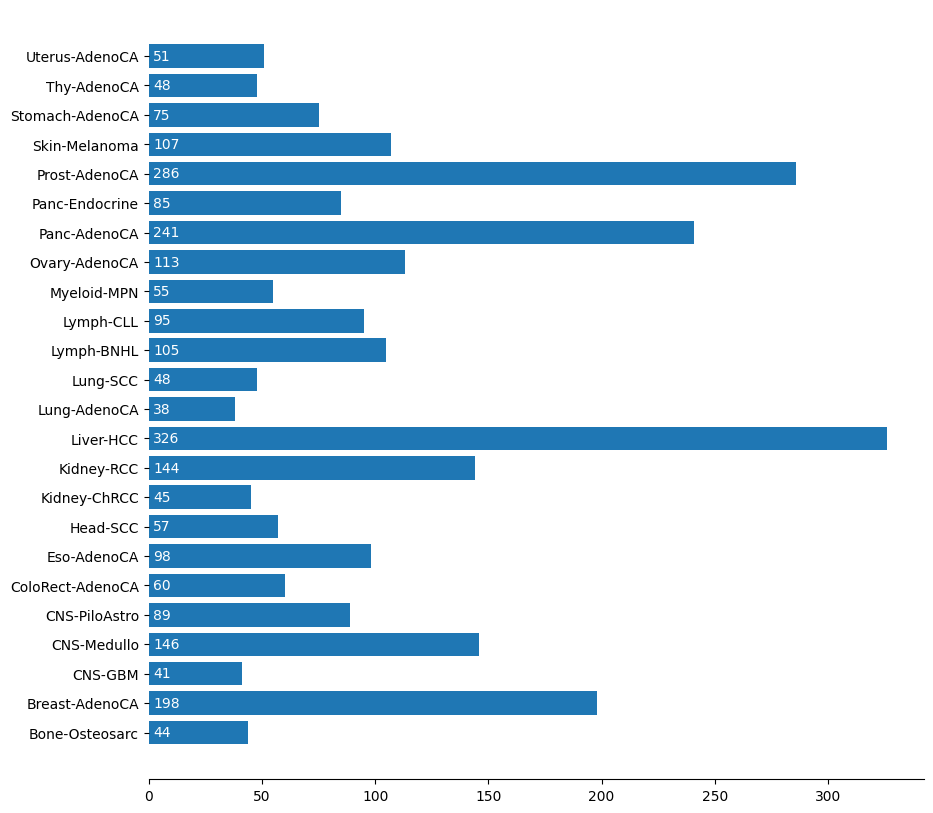

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(types.loc[:,'class_name'], types.loc[:, 'n_samples'], height=0.8, align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
addlabels( types.loc[:, 'n_samples'], types.loc[:,'class_name'])
plt.show()
fig.savefig("PCAWG.tiff", format='tiff', dpi=500, bbox_inches='tight')

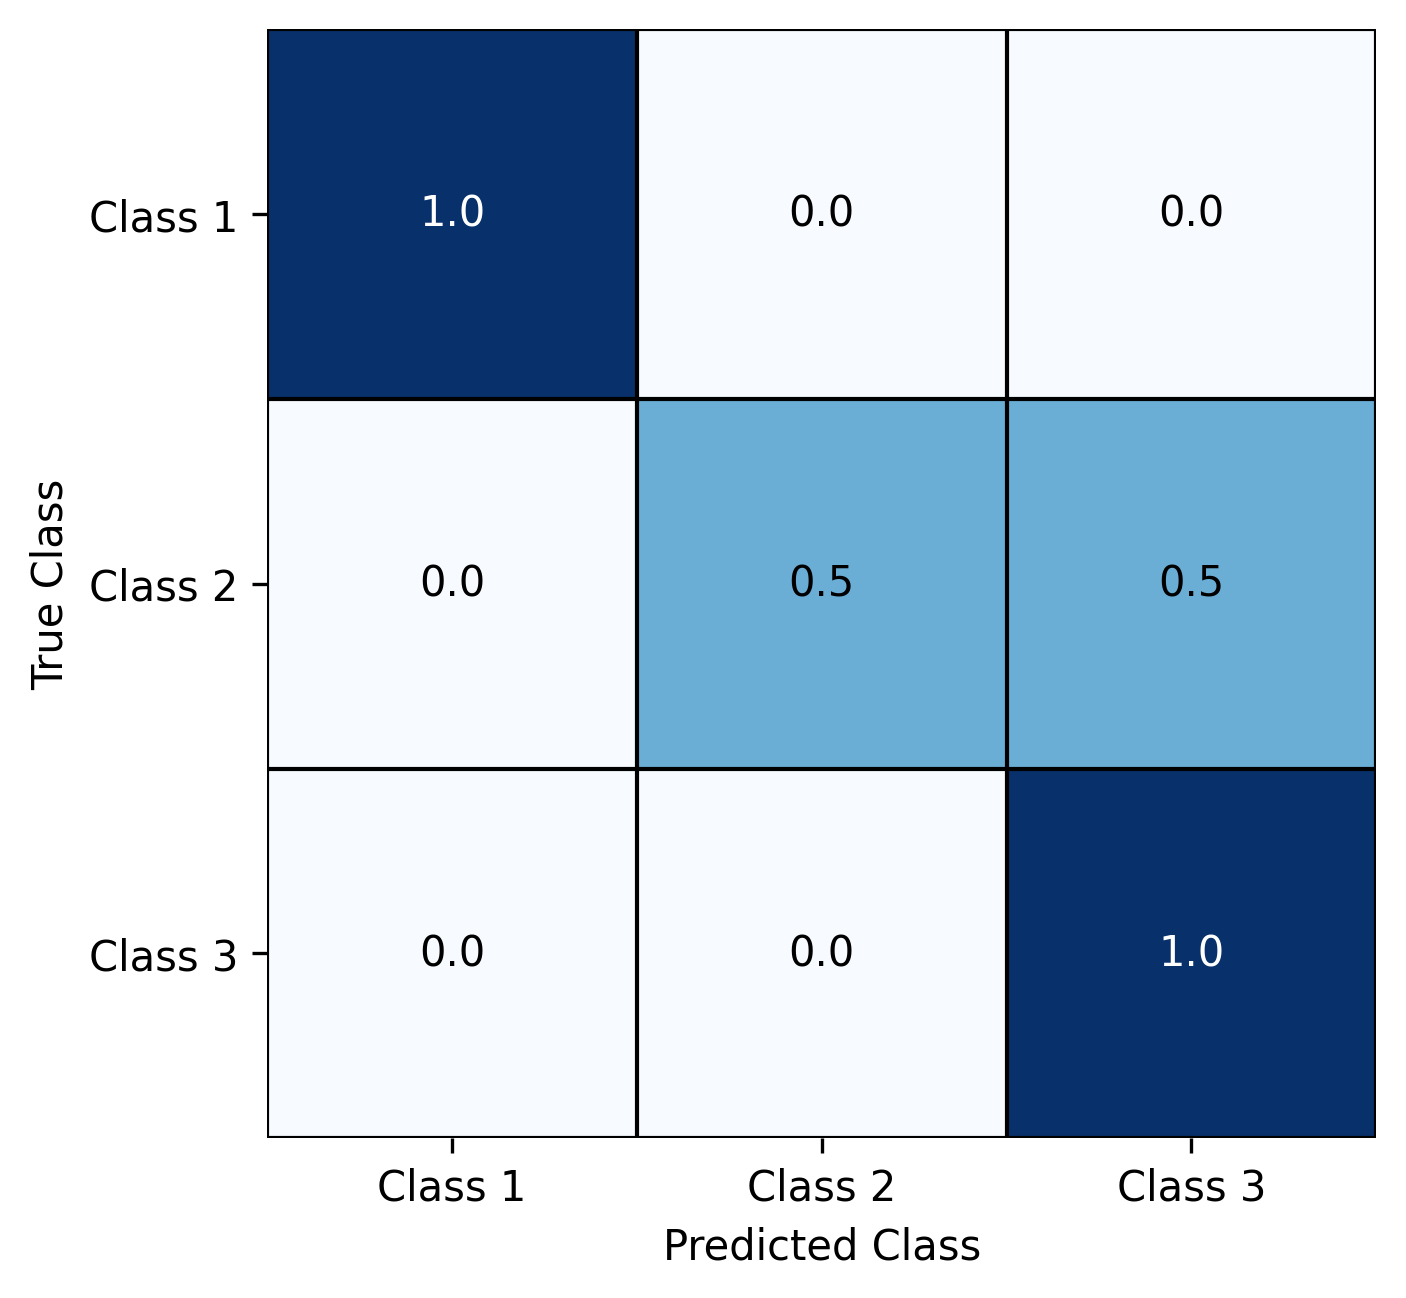

In [18]:
def plot_empty_confusion_matrix(labels):
    """
    Plottaa tyhjän confusion matrixin annetuilla luokilla.
    
    :param labels: Lista luokkien nimistä (esim. ['Luokka 1', 'Luokka 2', 'Luokka 3'])
    """
    num_labels = len(labels)
    matrix = np.array([[1,0,0],[0, 0.5, 0.5],[0,0,1]])

    fig, ax = plt.subplots(dpi=300)
    im = ax.imshow(matrix, cmap='Blues', vmin=0, vmax=1)

    # Asetetaan akselien etiketit
    ax.set_xticks(np.arange(num_labels))
    ax.set_yticks(np.arange(num_labels))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # X-akselin etiketit yläpuolelle
    ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

    # Ruudukko viivojen päälle
    ax.spines[:].set_visible(False)
    ax.set_xticks(np.arange(-0.5, num_labels), minor=True)
    ax.set_yticks(np.arange(-0.5, num_labels), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('True Class')
    # Tekstitä tyhjät ruudut
    for i in range(num_labels):
        for j in range(num_labels):
            if matrix[i,j] > 0.6:
                c = 'white'
            else:
                c = 'black'
            ax.text(j, i, matrix[i][j],
                    ha='center', va='center', color=c)

    # Lisätään väriavain
    #cbar = ax.figure.colorbar(im, ax=ax)
    #cbar.ax.set_ylabel('Value', rotation=-90, va="bottom")

    #plt.title('Confusion Matrix')
    plt.savefig(f'../figures/empty_c_matrix.png', format="png",bbox_inches='tight')
    plt.show()
# Käyttöesimerkki
labels = ['Class 1', 'Class 2', 'Class 3']
plot_empty_confusion_matrix(labels)

In [3]:
df1 = pd.read_csv('/csc/epitkane/projects/multimodal/models/MuAtMotif101/fold_8/val_logits_fold8_best_vallogits.tsv.gz', index_col= 0, sep='\t', compression='gzip')

In [4]:
data_path = '/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif101_UMAP_30_samples_each_file.tsv.gz'
#data_path = '/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif101_UMAP_30_samples_each_file.tsv.gz'
df = pd.read_csv(data_path, index_col= 0, sep='\t', compression='gzip')